## 环境准备

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [2]:
import numpy as np

np_load_old = np.load
# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# restore np.load for future normal usage
# np.load = np_load_old

| Case场景 | 数据            | 数据结构（x.shape, y.shape）                                 | 网络结构                                                     | 优化器  | 损失函数                 | 监控指标 |
| -------- | --------------- | ------------------------------------------------------------ | ------------------------------------------------------------ | ------- | ------------------------ | -------- |
| 多分类   | MNIST手写字识别 | train: (60000, 28, 28) (60000,)<br/> test: (10000, 28, 28) (10000,) | (512, activation='relu', input_shape=(28 * 28,))<br/>(10, activation='softmax') | rmsprop | categorical_crossentropy | accuracy |
| 二分类   | 电影评论IMDB    | train: (25000,) (25000,)<br/> test: (25000,) (25000,) | (16, activation='relu', input_shape=(10000,))<br/>(16, activation='relu')<br/>(1, activation='sigmoid') | rmsprop | binary_crossentropy      | accuracy |
| 多分类   | 新闻分类        | train: (8982,) (8982,)<br/> test: (2246,) (2246,)   | (64, activation='relu', input_shape=(10000,))<br/>(64, activation='relu')<br/>(46, activation='softmax') | rmsprop | categorical_crossentropy | accuracy |
| 回归问题 | 房价预测        | train: (404, 13) (404,) <br/>test: (102, 13) (102,) | (64, activation='relu', input_shape=(13,)<br/>(64, activation='relu')<br/>(1) | rmsprop | mse                      | mae      | 
 

## MNIST 手写字体识别【多分类】

### 加载数据

In [3]:
from keras.datasets import mnist
# 加载mnist手写数字图片
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print('train data:', train_images.shape, train_labels.shape)
print('test data:', test_images.shape, test_labels.shape)

train data: (60000, 28, 28) (60000,)
test data: (10000, 28, 28) (10000,)


In [4]:
train_images[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [15]:
train_images.ndim

3

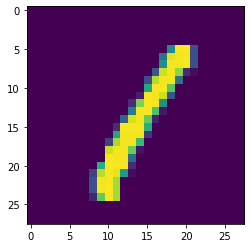

In [13]:
import matplotlib.pyplot as plt
plt.imshow(train_images[3])

In [14]:
train_labels[3]

1

### 数据处理

In [16]:
# 把三阶的张量 变成 二阶的，RGB归一化
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [17]:
train_images.ndim

2

In [18]:
from keras.utils import to_categorical
# 将分类标签one-hot处理
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(train_labels.shape)

(60000, 10)


In [19]:
train_labels[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### 构建网络

In [26]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
network.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.2573 - acc: 0.9245
Epoch 2/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.1052 - acc: 0.9692
Epoch 3/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.0691 - acc: 0.9790
Epoch 4/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.0505 - acc: 0.9848
Epoch 5/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.0384 - acc: 0.9883
Epoch 6/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.0294 - acc: 0.9908
Epoch 7/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.0227 - acc: 0.9935
Epoch 8/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.0173 - acc: 0.9950
Epoch 9/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.0133 - acc: 0.9963
Epoch 10/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.0101 - acc: 0.9971

### 网络验证

In [27]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc, 'test_loss:', test_loss)

10000/10000 [==============================] - 0s 39us/step
test_acc: 0.9809 test_loss: 0.08205402565721888


## 电影评论IMDB 【二分类】

### 加载数据

In [28]:
# 加载IMDB数据，2.5W的正面评论和2.5W的负面评论
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print('train data:', train_data.shape, train_labels.shape)
print('test data:', test_data.shape, test_labels.shape)

train data: (25000,) (25000,)
test data: (25000,) (25000,)


In [13]:
# 已经将单词变成了对应的单词ID，max ID 100000
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [14]:
# 1表示一条正面评论
train_labels[0]

1

In [15]:
# 每一个句子里面最大ID --> 所有句子里面的最大ID
max([max(s) for s in train_data])

9999

In [21]:
# 将word id反向翻译成文本
def reverse_transform_imdb(word_ids, label):
    # {'fawn': 34701,...}
    word_index = imdb.get_word_index()
    # {'34701': fawn,...}
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    # We decode the review; note that our indices were offset by 3
    # because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
    decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in word_ids])
    print(decoded_review)
    print(label)

In [23]:
reverse_transform_imdb(train_data[0], train_labels[0])

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

### 数据处理

In [33]:
# 特征工程
# 特征数据 --> 向量one hot编码
# 标签 
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [34]:
print(x_train[0])
print(y_train[0])

[0. 1. 1. ... 0. 0. 0.]
1.0


In [35]:
# 留下验证集，训练：验证：测试 = 3:2:5 = 15000:10000:25000
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### 构建网络

In [36]:
from keras import models
from keras import layers
# 定义网络结构
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [37]:
from keras import optimizers
# 定义网络优化器、损失函数、监控指标
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [38]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 152us/step - loss: 0.5366 - acc: 0.7763 - val_loss: 0.4083 - val_acc: 0.8569
Epoch 2/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.3186 - acc: 0.8976 - val_loss: 0.3267 - val_acc: 0.8730
Epoch 3/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.2341 - acc: 0.9245 - val_loss: 0.2865 - val_acc: 0.8872
Epoch 4/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.1843 - acc: 0.9402 - val_loss: 0.2750 - val_acc: 0.8911
Epoch 5/20
15000/15000 [==============================] - 2s 106us/step - loss: 0.1528 - acc: 0.9509 - val_loss: 0.2988 - val_acc: 0.8808
Epoch 6/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.1232 - acc: 0.9621 - val_loss: 0.2881 - val_acc: 0.8877
Epoch 7/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.1073 - acc: 0.9662 - val_loss: 0.3036 - 

### 网络验证

In [51]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

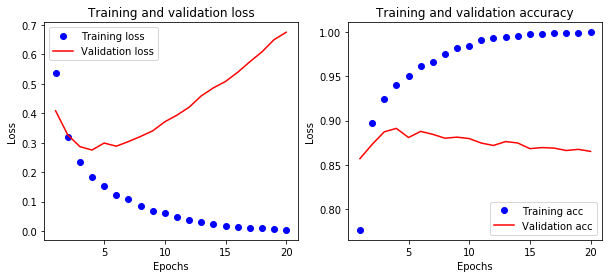

In [39]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10,4))
plt.subplot(121)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [40]:
# 使用early stop来创建最终网络

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)
model.predict(x_test)

Epoch 1/4
25000/25000 [==============================] - 2s 85us/step - loss: 0.4738 - acc: 0.8201
Epoch 2/4
25000/25000 [==============================] - 2s 72us/step - loss: 0.2638 - acc: 0.9107
Epoch 3/4
25000/25000 [==============================] - 2s 74us/step - loss: 0.1994 - acc: 0.9300
Epoch 4/4
25000/25000 [==============================] - 3s 106us/step
[0.3273263478755951, 0.87084]


array([[0.13109899],
       [0.99972534],
       [0.24367934],
       ...,
       [0.0725871 ],
       [0.04731342],
       [0.47451854]], dtype=float32)

## 新闻分类【多分类】

### 加载数据

In [41]:
# 路透社数据集
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
print('train data:', train_data.shape, train_labels.shape)
print('test data:', test_data.shape, test_labels.shape)

train data: (8982,) (8982,)
test data: (2246,) (2246,)


In [54]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [55]:
train_labels[0]

3

In [57]:
# {"mdbl": 10996,...}
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

### 数据处理

In [42]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [43]:
from keras.utils.np_utils import to_categorical
# 数据处理
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train_labels = to_categorical(train_labels)
y_test_labels = to_categorical(test_labels)
# 验证集划分 7982:1000:2246
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train_labels[:1000]
partial_y_train = y_train_labels[1000:]

In [44]:
print(x_train[0])
print(len(x_train[0]))

[0. 1. 1. ... 0. 0. 0.]
10000


In [47]:
print(y_train_labels[0])
print(len(y_train_labels[0]))

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
46


### 构建网络

In [48]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [49]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 155us/step - loss: 2.5307 - acc: 0.4954 - val_loss: 1.7224 - val_acc: 0.6140
Epoch 2/20
7982/7982 [==============================] - 1s 97us/step - loss: 1.4487 - acc: 0.6875 - val_loss: 1.3496 - val_acc: 0.7070
Epoch 3/20
7982/7982 [==============================] - 1s 103us/step - loss: 1.1001 - acc: 0.7638 - val_loss: 1.1732 - val_acc: 0.7420
Epoch 4/20
7982/7982 [==============================] - 1s 92us/step - loss: 0.8733 - acc: 0.8155 - val_loss: 1.0797 - val_acc: 0.7610
Epoch 5/20
7982/7982 [==============================] - 1s 91us/step - loss: 0.7060 - acc: 0.8470 - val_loss: 0.9849 - val_acc: 0.7800
Epoch 6/20
7982/7982 [==============================] - 1s 90us/step - loss: 0.5694 - acc: 0.8797 - val_loss: 0.9405 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s 92us/step - loss: 0.4619 - acc: 0.9037 - val_loss: 0.9082 - val_acc: 0.8010
Epoch

### 网络验证

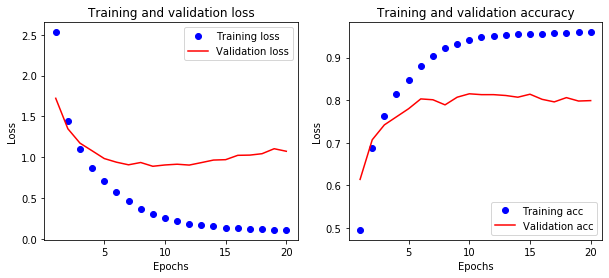

In [51]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10,4))
plt.subplot(121)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [73]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test_labels)
print(results)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 162us/step - loss: 2.7781 - acc: 0.5021 - val_loss: 1.8360 - val_acc: 0.6220
Epoch 2/8
7982/7982 [==============================] - 1s 103us/step - loss: 1.4836 - acc: 0.6917 - val_loss: 1.3445 - val_acc: 0.7010
Epoch 3/8
7982/7982 [==============================] - 1s 93us/step - loss: 1.0794 - acc: 0.7724 - val_loss: 1.1523 - val_acc: 0.7500
Epoch 4/8
7982/7982 [==============================] - 1s 92us/step - loss: 0.8481 - acc: 0.8217 - val_loss: 1.0480 - val_acc: 0.7720
Epoch 5/8
7982/7982 [==============================] - 1s 93us/step - loss: 0.6759 - acc: 0.8589 - val_loss: 0.9691 - val_acc: 0.8040
Epoch 6/8
7982/7982 [==============================] - 1s 96us/step - loss: 0.5411 - acc: 0.8882 - val_loss: 0.9426 - val_acc: 0.8050
Epoch 7/8
7982/7982 [==============================] - 1s 93us/step - loss: 0.4396 - acc: 0.9085 - val_loss: 0.8912 - val_acc: 0.8190
Epoch 8/8
22

In [52]:
model.predict(x_test[0].reshape(1,10000))

array([[9.6808299e-07, 8.7839504e-07, 6.3784649e-09, 9.7583508e-01,
        2.2279868e-02, 2.0879574e-09, 4.5201713e-09, 1.2287752e-05,
        3.9229490e-04, 5.3193691e-07, 3.4381114e-06, 2.1392638e-04,
        2.3523162e-05, 1.0348103e-07, 8.7486995e-08, 1.6430553e-07,
        1.9786032e-04, 1.7974370e-06, 2.8292543e-06, 7.0295602e-05,
        8.0640748e-04, 8.6502019e-05, 1.1673056e-06, 2.2948409e-08,
        3.3112099e-07, 2.8046383e-08, 7.9273019e-11, 4.2639488e-07,
        9.3614108e-06, 4.7556082e-07, 3.1302618e-05, 1.4597501e-08,
        6.1677429e-06, 8.8893877e-08, 5.8569362e-06, 2.5856630e-07,
        1.3798254e-05, 5.0501935e-08, 8.1980670e-07, 2.0568230e-08,
        2.9115785e-07, 4.9548646e-07, 2.3506455e-07, 5.0027822e-09,
        1.2162907e-09, 9.0223762e-10]], dtype=float32)

In [88]:
np.sum(model.predict(x_test[0].reshape(1,10000)))

0.9999999

In [57]:
print(np.argmax(model.predict(x_test[1].reshape(1,10000))))
print(test_labels[1])

10
10


## 房价预测【回归】

### 加载数据

In [58]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()
print('train data:', train_data.shape, train_targets.shape)
print('test data:', test_data.shape, test_targets.shape)

train data: (404, 13) (404,)
test data: (102, 13) (102,)


In [59]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [60]:
train_targets[0]

15.2

### 数据处理

In [61]:
# 标准化
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

### 构建网络

In [63]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1)) #直接输出，如果是需要归一到0-1，可以加上sigmoid
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

### 网络验证

In [73]:
import numpy as np
# 4折交叉验证
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100 #迭代次数
all_scores = [] 
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k，取一份验证集
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions，剩下的全是训练集
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
#     model.fit(partial_train_data, partial_train_targets,
#               epochs=num_epochs, batch_size=1, verbose=0)
    
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)
    
    # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    print('finish #', i)

processing fold # 0
finish # 0
processing fold # 1
finish # 1
processing fold # 2
finish # 2
processing fold # 3
finish # 3


In [74]:
print(all_scores, '---> ', np.mean(all_scores))

[2.2117457814735944, 2.4388168731538378, 2.5955066468456005, 2.401444122932925] --->  2.4118783561014894


In [75]:
print(len(all_mae_histories), len(all_mae_histories[0]))

4 100


In [76]:
# 将(4, 100)合并成(1, 100)
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

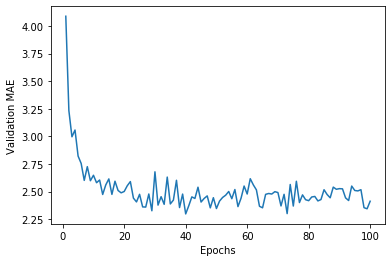

In [77]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [78]:
# 指数平滑
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

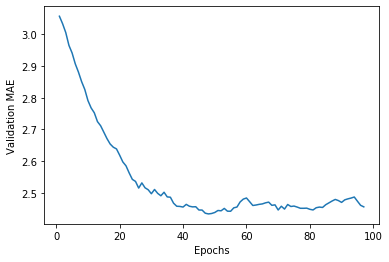

In [79]:
smooth_mae_history = smooth_curve(average_mae_history[3:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [80]:
# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mse_score, test_mae_score)

102/102 [==============================] - 0s 2ms/step
18.694472668217678 2.6254755655924478


In [89]:
model.predict(test_data[0].reshape(1, 13))

array([[7.475122]], dtype=float32)